In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("Titanic-dataset.csv")

In [3]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S


In [4]:
titanic.shape

(891, 12)

# EDA

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
import seaborn as sns

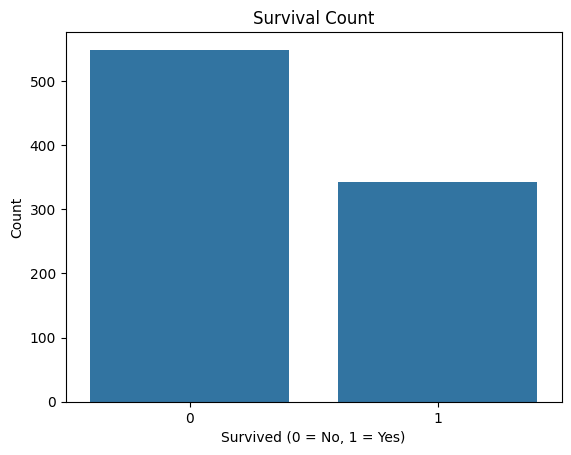

In [7]:
sns.countplot(data=titanic, x='Survived')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

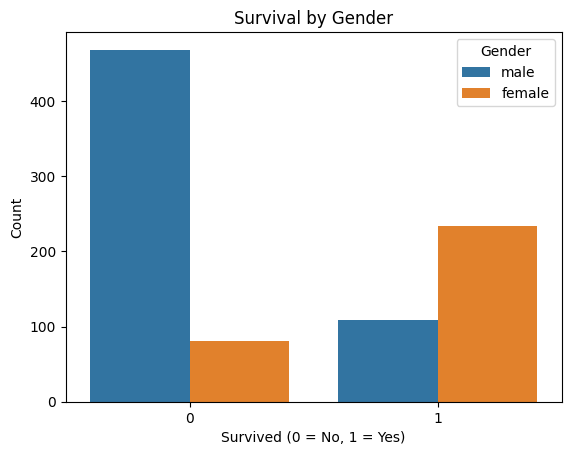

In [8]:
sns.countplot(data=titanic, x='Survived', hue='Sex')
plt.title("Survival by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

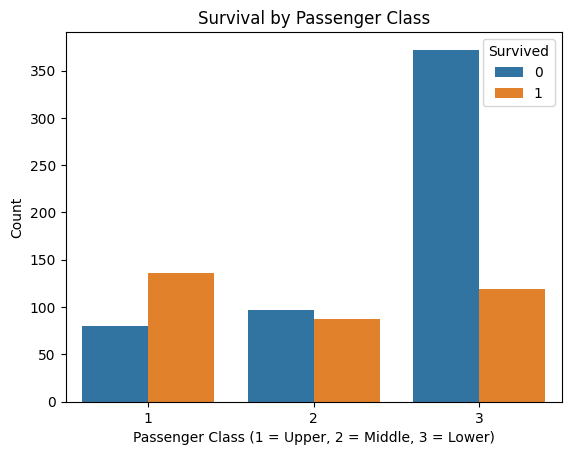

In [9]:
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

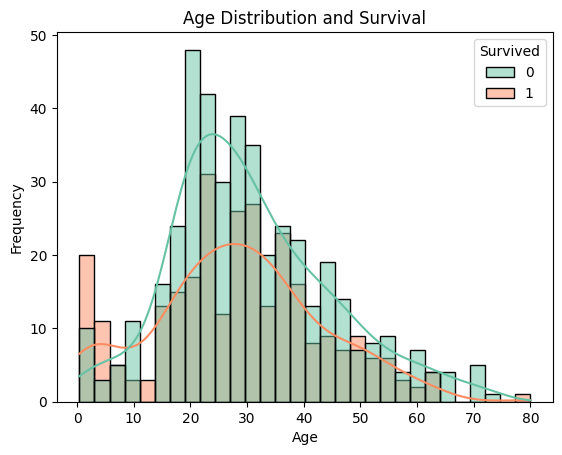

In [10]:
sns.histplot(data=titanic, x='Age', bins=30, kde=True, hue='Survived', palette="Set2")
plt.title("Age Distribution and Survival")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Interpretation: Younger passengers had higher survival rates.

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
miss_val_per = pd.DataFrame((titanic.isnull().sum() / len(titanic)) * 100)

<Axes: title={'center': 'Missing Values in Percentage'}, ylabel='Percentage'>

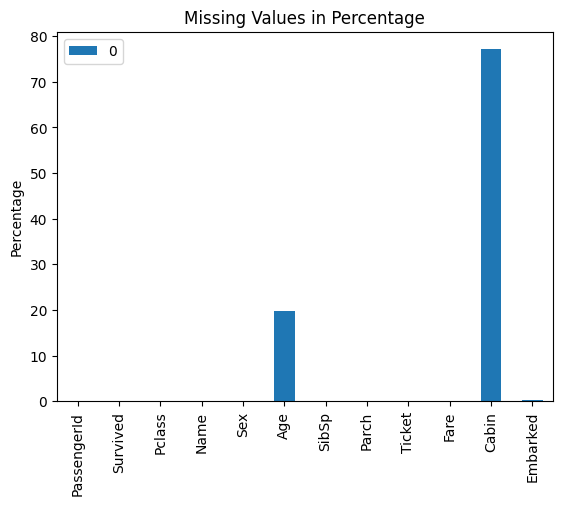

In [13]:
miss_val_per.plot(kind='bar', title='Missing Values in Percentage', ylabel='Percentage')

In [14]:
#‘cabin’ feature has 75% missing data, it’s likely not useful for predicting survival.
titanic.drop(['Cabin'], axis=1, inplace=True)

# Value Imputation for Age and Emabarked column

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
numeric_imputer = SimpleImputer(strategy='mean')
titanic['Age'] = numeric_imputer.fit_transform(titanic[['Age']])

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [19]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

# Data Encoding for sex and Embarked column

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(titanic[['Sex', 'Embarked']])

In [22]:
encoded_columns = encoder.get_feature_names_out(['Sex', 'Embarked'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

In [23]:
titanic = pd.concat([titanic.drop(['Sex', 'Embarked'], axis=1), encoded_df], axis=1)

# Feature construction using Sibsp and parch

In [24]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [25]:
titanic = titanic.drop(columns=['SibSp', 'Parch'])

In [26]:
titanic = titanic.drop(columns=['PassengerId', 'Name','Ticket'])

# Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])

In [30]:
titanic.sample(10)

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
771,0,3,1.408333,-0.490280,1.0,0.0,1.0,1
613,0,3,0.000000,-0.492378,1.0,1.0,0.0,1
388,0,3,0.000000,-0.492797,1.0,1.0,0.0,1
476,0,2,0.330972,-0.225593,1.0,0.0,1.0,2
462,0,1,1.331378,0.126764,1.0,0.0,1.0,1
314,0,2,1.023561,-0.119886,1.0,0.0,1.0,3
241,1,3,0.000000,-0.336334,0.0,1.0,0.0,2
68,1,3,-0.977252,-0.488854,0.0,0.0,1.0,7
508,0,3,-0.130754,-0.194888,1.0,0.0,1.0,1
582,0,2,1.870059,-0.124920,1.0,0.0,1.0,1


# Model Training

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'], test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr_model = LogisticRegression()

In [34]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lr_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.81
